### Predict next day stock price 

1. Read the csv 
2. Calculate the features
3. Prepare row, each row is each day 
4. split valid and training 
5. svn / nn 

-------

###  1. read csv

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline


stockName=pd.read_csv('stockCode.csv', sep=',',header=None).values

# Date,Open,High,Low,Close,Volume,Adj Close
# stockName = np.genfromtxt ('./stockCode.csv', delimiter=",",dtype=[('c', '<f8'),('c', '<f60'),('c', '<80')])

csvHolder = []

for row in stockName[:40]:    
    code = row[0]
    print('./dataset/'+ str(code).zfill(4) +'.csv')
    csvHolder.append(np.genfromtxt ('./dataset/'+ str(code).zfill(4) +'.csv', delimiter=",", skip_header=1))

stockData = np.concatenate(csvHolder, axis=0)

./dataset/0001.csv
./dataset/0002.csv
./dataset/0003.csv
./dataset/0004.csv
./dataset/0005.csv
./dataset/0006.csv
./dataset/0007.csv
./dataset/0008.csv
./dataset/0009.csv
./dataset/0010.csv
./dataset/0011.csv
./dataset/0012.csv
./dataset/0014.csv
./dataset/0015.csv
./dataset/0016.csv
./dataset/0017.csv
./dataset/0018.csv
./dataset/0019.csv
./dataset/0020.csv
./dataset/0021.csv
./dataset/0022.csv
./dataset/0023.csv
./dataset/0024.csv
./dataset/0025.csv
./dataset/0026.csv
./dataset/0027.csv
./dataset/0028.csv
./dataset/0029.csv
./dataset/0030.csv
./dataset/0031.csv
./dataset/0032.csv
./dataset/0033.csv
./dataset/0034.csv
./dataset/0035.csv
./dataset/0036.csv
./dataset/0037.csv
./dataset/0038.csv
./dataset/0039.csv
./dataset/0040.csv
./dataset/0041.csv


In [2]:
stockData.shape

(52176, 7)

In [3]:
  
historyDays = 10
class FeaturePreparation:
    def __init__(self, npCsv):
        '''
        input must be np array 
        format
        Date,Open,High,Low,Close,Volume,Adj Close
        '''
        self.csv = npCsv
        
    def getFormattedArray(self):      
        dataX = np.zeros((len(self.csv)-historyDays,historyDays,6))
        dataY = np.zeros((len(self.csv)-historyDays,2))
        dataDate = []
        
        for i in range(len(self.csv)-historyDays):
            for j in range(historyDays):
                for feature in range(6):
                    dataX[i][j][feature] = self.csv[i+1+j][feature+1]
            # is up
            dataY[i][0] = 0 if (self.csv[i][4] - self.csv[i+1][4]) / self.csv[i+1][4] > 0  else 1 
            # is down
            dataY[i][1] = 1 if (self.csv[i][4] - self.csv[i+1][4]) / self.csv[i+1][4] > 0  else 0 
            dataDate.append(self.csv[i][0])
            
        return dataDate, dataX, dataY

tstal data  52166


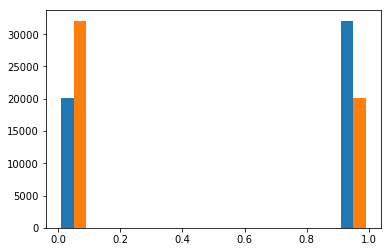

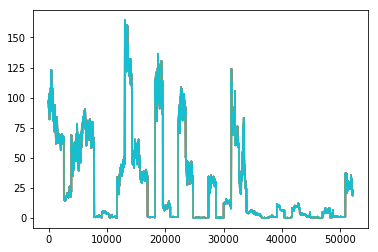

In [4]:
featureGenerator = FeaturePreparation(stockData)
date, dataX, dataY = featureGenerator.getFormattedArray()

plt.hist(dataY)
plt.figure()
plt.plot(dataX[:,:,3])
print("tstal data ", len(dataY))

In [5]:
d_train, d_test, x_train, x_test, y_train, y_test= train_test_split(date, dataX, dataY, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import sklearn
import keras
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dropout, Conv1D, GlobalMaxPooling1D
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
dropoutRate = 0.5


model = Sequential()

with tf.name_scope('input'):
    model.add(Dense(32, input_shape=(dataX.shape[1],6)))
    model.add(Activation('relu'))
    model.add(Dropout(dropoutRate))

with tf.name_scope('conv1'):
    model.add(Conv1D(20, 3, border_mode='valid', activation='relu' ))
    model.add(GlobalMaxPooling1D())
    print(model.output_shape)
    
with tf.name_scope('fc1'):
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dropout(dropoutRate))
    
with tf.name_scope('fc2'):
    model.add(Dense(2))
    model.add(Activation('relu'))
    model.add(Activation('softmax'))
    
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, nb_epoch=10, batch_size=32,validation_data=(x_test, y_test),shuffle=True)


(None, 20)
Train on 41732 samples, validate on 10434 samples
Epoch 1/10
41732/41732 [==============================] - 4s - loss: 6.1847 - acc: 0.6160 - val_loss: 6.2540 - val_acc: 0.6119

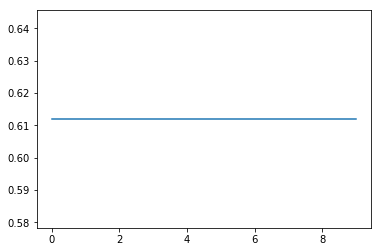

In [10]:
plt.plot(history.history["val_acc"])

In [11]:
print("predict test data")
y_res = tf.placeholder(tf.float32, [None, dataX.shape[1]], name='y-input')
pred = model.predict_on_batch(x_test)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)   
    p = acc.eval({y_res:y_test_processed})
    print(p)

predict test data


NameError: name 'acc' is not defined